<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [59]:
import pandas as pd
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)
display(df)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


177613.075 17876.4


,pageviews,year,month,month_num,day
date,,,,,
2016-05-19,19736,2016,May,5,19
2016-05-26,18060,2016,May,5,26
2016-05-27,19997,2016,May,5,27
2016-05-28,19044,2016,May,5,28
2016-05-29,20325,2016,May,5,29
...,...,...,...,...,...
2019-11-24,138875,2019,Nov,11,24
2019-11-29,171584,2019,Nov,11,29
2019-11-30,141161,2019,Nov,11,30


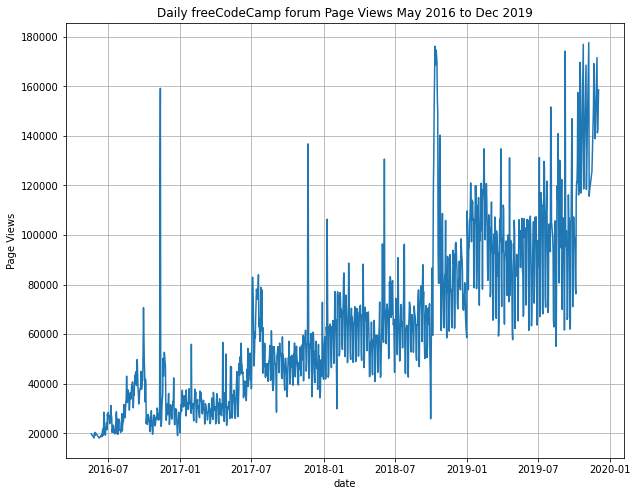

In [61]:
import matplotlib.pyplot as plt
import datetime as dt

# convert the date column to datetime type
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

#create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime("%b")
df['month_num']=df['date'].dt.month
df['day'] = df['date'].dt.day
df.rename(columns={'value':'pageviews'}, inplace=True)

#set the index to the date column.
indexed_df = df.set_index('date') #create new df so can run several times!
# display(indexed_df)

#filtering
filt_max = indexed_df['pageviews'].quantile(0.975)
filt_min = indexed_df['pageviews'].quantile(0.025)
print(filt_max, filt_min)
filter = ((filt_min <= indexed_df['pageviews']) & (indexed_df['pageviews']<=filt_max))
# display(filter)
filtered_df = indexed_df[filter]
display(filtered_df)
dates = filtered_df.index
pageviews = filtered_df['pageviews']
plt.plot(dates,pageviews)
plt.xlabel("date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp forum Page Views May 2016 to Dec 2019")
# plt.xticks(rotation=45)
plt.grid()
plt.show()

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


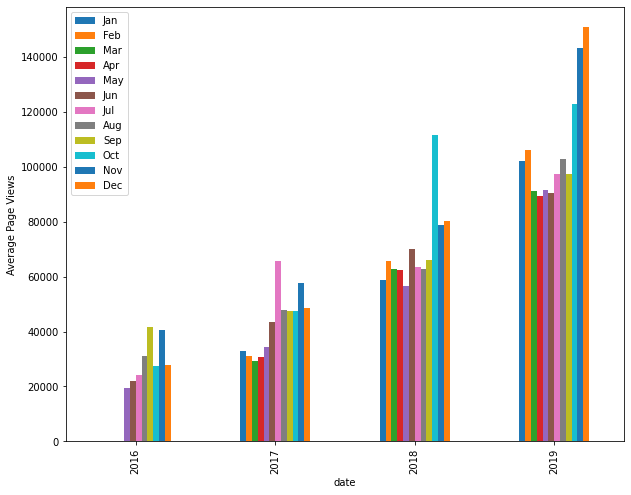

In [62]:
import numpy as np
# table = pd.pivot_table(filtered_df,values = 'value', index = ['year'], columns=['month'], aggfunc=np.average).sort_values(by = filtered_df.index.month)
table = filtered_df.pivot_table(index = filtered_df.index.year, columns=filtered_df.index.month, values = 'pageviews',aggfunc = np.average)
# df_pivot = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')
display(table)
piv_plot = table.plot(kind='bar')
piv_plot.legend(['Jan','Feb','Mar','Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #could have derived this from unique list of months?
plt.rcParams["figure.figsize"] = (10, 8)
plt.ylabel("Average Page Views")
plt.show()


###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


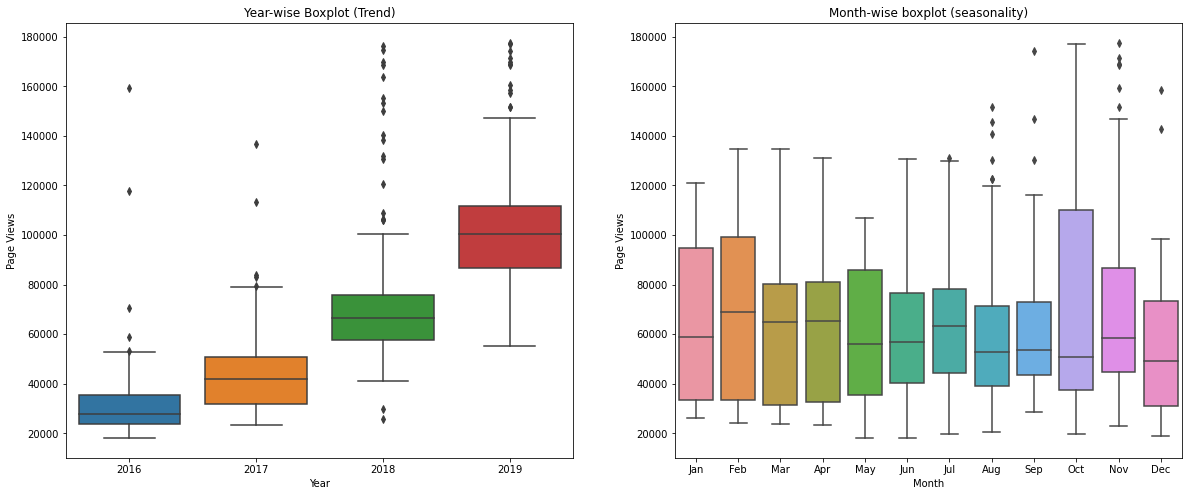

In [63]:
import seaborn as sns
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html - if it had not been already in this long format
#create seaborn boxplots by group
#A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
sorted_df = filtered_df.sort_values('month_num') #otherwise months start in May whcih was the first month
fig, ax =plt.subplots(1,2,figsize=(20,8))

myplot1 = sns.boxplot(x='year', y='pageviews', data=sorted_df,ax=ax[0]).set(xlabel='Year',ylabel='Page Views',title="Year-wise Boxplot (Trend)")
myplot2 = sns.boxplot(x='month', y='pageviews', data=sorted_df, ax=ax[1]).set(xlabel='Month',ylabel='Page Views', title= "Month-wise boxplot (seasonality)")
fig.show()

# https://seaborn.pydata.org/tutorial/axis_grids.html
# g = sns.FacetGrid(filtered_df, col="year", hue="month")
# g.map(sns.boxplot, "date", "values", alpha=.7)
# g.add_legend()


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


# Reflect

What caused the biggest problems?
How did you solve these problems?